# 2021 빅콘테스트 베럴타구 정의와 OPS 예측

# 1. Data & Library

In [1]:
#기본 패키지
import time
import warnings
warnings.filterwarnings('ignore')

#데이터 처리 패키지
import numpy as np

#시각화 패키지
import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
from matplotlib import rc 
rc('font', family='malgun gothic')
rc('axes', unicode_minus = False)
import seaborn as sns
plt.style.use('ggplot')

#수학 패키지
from scipy.stats.mstats import gmean
from scipy.stats import randint as sp_randint
from scipy.stats import uniform
import uuid
import random
from tqdm import tqdm
from itertools import combinations

#머신러닝 패키지
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import *
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LogisticRegression, SGDClassifier, LinearRegression, SGDRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from vecstack import stacking, StackingTransformer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

#딥러닝 패키지
import tensorflow.keras as keras
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import * #Model
from tensorflow.keras.optimizers import *
from tensorflow.keras.regularizers import *
#from keras.utils.np_utils import *
#from tensorflow.keras.utils.vis_utils import * #model_to_dot
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.losses import *
from tensorflow.keras import layers
print('tf Version \n', tf.__version__)
print('tf.keras Version \n', tf.keras.__version__)

import lightgbm as lgb
import numpy as np
import pandas as pd
from pprint import pprint
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
import seaborn as sns
from tensorflow import keras
import tensorflow as tf
import warnings
from tqdm import tqdm, tqdm_notebook
from sklearn.model_selection import cross_val_score
import random

import kerastuner as kt


from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectPercentile
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rc('font', family=fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()) # for Windows OS user
import datetime
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge
from tensorflow import keras
from scipy.stats.mstats import gmean
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import sys, warnings
if not sys.warnoptions: warnings.simplefilter("ignore")
    

import pandas as pd
import os 
import glob
import numpy as np
# Standard library imports
import os 
import glob
import numpy as np
import itertools

# Third party imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as LGB
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Lasso,ElasticNet,Ridge
from sklearn.svm import SVR

from tqdm import tqdm
import plotly 
import plotly.express as px
import plotly.graph_objects as go 
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import shap
import seaborn as sns

import klib
# Dacon plotly 그림 업로드 
pd.options.plotting.backend = 'plotly'
## plotly.io를 import 한 후 renderers 기본값을 꼭 "notebook_connected" 로 설정해주시기 바랍니다.
import plotly.io as pio
pio.renderers.default = "notebook_connected"

#options 
pd.set_option('display.max_columns', None)
#rc('font', family='AppleGothic')
#matplotlib.rcParams['axes.unicode_minus'] = False

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

tf Version 
 2.4.1
tf.keras Version 
 2.4.0


In [2]:
import glob
data_path_1 = os.path.abspath('../data/01_제공데이터')
data_path_2 = os.path.abspath('../data/02_평가데이터')
data_path_3 = os.path.abspath('../data/03_수집데이터')

# 1. Read Data

In [3]:
csv_files = glob.glob(data_path_1+'/*.csv')

dataset = {}    # Raw data Dick 자징하기
files = []      # Raw data file 리스트 
for name in csv_files:
    raw = pd.read_csv(name,encoding = "cp949")
    name = os.path.basename(name).split('.')[0] # 파일의 확장자 제외 이름만 가져오기 
    dataset.update({name : raw})    # 데이터 사전 

    files.append(name)   

In [4]:
display(files)

['2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2018',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2019',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2020',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_HTS_2021',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_경기일정_2021',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_선수_2018',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_선수_2019',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_선수_2020',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_선수_2021',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2018',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2019',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2020',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_타자 기본_2021',
 '2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_팀']

In [5]:
hit_2018 = dataset[files[0]]
hit_2019 = dataset[files[1]]
hit_2020 = dataset[files[2]]
hit_2021 = dataset[files[3]]

player_2018 = dataset[files[5]]
player_2019 = dataset[files[6]]
player_2020 = dataset[files[7]]
player_2021 = dataset[files[8]]

batter_2018 = dataset[files[9]]
batter_2019 = dataset[files[10]]
batter_2020 = dataset[files[11]]
batter_2021 = dataset[files[12]]

# 2. 데이터전처리

## Data Cleansing & Pre-Processing

In [6]:
#컬럼명 변경
hit_2018.columns = ["년도", "경기코드", "투구코드", "선수코드", "팀코드", "이닝", "타구속도","발사각도", "타구종류", "구속", "경기장"]
hit_2019.columns = ["년도", "경기코드", "투구코드", "선수코드", "팀코드", "이닝", "타구속도","발사각도", "타구종류", "구속", "경기장"]
hit_2020.columns = ["년도", "경기코드", "투구코드", "선수코드", "팀코드", "이닝", "타구속도","발사각도", "타구종류", "구속", "경기장"]
hit_2021.columns = ["년도", "경기코드", "투구코드", "선수코드", "팀코드", "이닝", "타구속도","발사각도", "타구종류", "구속", "경기장"]

player_2018.columns = ["년도", "선수코드", "이름", "팀코드", "포지션", "나이", "연봉"]
player_2019.columns = ["년도", "선수코드", "이름", "팀코드", "포지션", "나이", "연봉"]
player_2020.columns = ["년도", "선수코드", "이름", "팀코드", "포지션", "나이", "연봉"]
player_2021.columns = ["년도", "선수코드", "이름", "팀코드", "포지션", "나이", "연봉"]

batter_2018.columns = ["년도", "선수코드", "출장경기수", "타석", "타수", "타율", "안타", "홈런", "루타", "장타율", "희생플라이", "볼넷", "삼진", "고의사구", "사구", "병살타"]
batter_2019.columns = ["년도", "선수코드", "출장경기수", "타석", "타수", "타율", "안타", "홈런", "루타", "장타율", "희생플라이", "볼넷", "삼진", "고의사구", "사구", "병살타"]
batter_2020.columns = ["년도", "선수코드", "출장경기수", "타석", "타수", "타율", "안타", "홈런", "루타", "장타율", "희생플라이", "볼넷", "삼진", "고의사구", "사구", "병살타"]
batter_2021.columns =["년도", "선수코드", "출장경기수", "타석", "타수", "타율", "안타", "홈런", "루타", "장타율", "희생플라이", "볼넷", "삼진", "고의사구", "사구", "병살타"]

In [7]:
#타구데이터 출루,출루율 ,ops 생성
batter_2018["출루"] = batter_2018["안타"] + batter_2018["볼넷"] + batter_2018["사구"] + batter_2018["고의사구"]
batter_2019["출루"] = batter_2019["안타"] + batter_2019["볼넷"] + batter_2019["사구"] + batter_2019["고의사구"]
batter_2020["출루"] = batter_2020["안타"] + batter_2020["볼넷"] + batter_2020["사구"] + batter_2020["고의사구"]
batter_2021["출루"] = batter_2021["안타"] + batter_2021["볼넷"] + batter_2021["사구"] + batter_2021["고의사구"]

batter_2018["출루율"] = batter_2018["출루"] / (batter_2018["타수"]+batter_2018["볼넷"]+batter_2018["사구"] + batter_2018["고의사구"]+batter_2018["희생플라이"] )
batter_2019["출루율"] = batter_2019["출루"] / (batter_2019["타수"]+batter_2019["볼넷"]+batter_2019["사구"] + batter_2019["고의사구"]+batter_2019["희생플라이"] )
batter_2020["출루율"] = batter_2020["출루"] / (batter_2020["타수"]+batter_2020["볼넷"]+batter_2020["사구"] + batter_2020["고의사구"]+batter_2020["희생플라이"] )
batter_2021["출루율"] = batter_2021["출루"] / (batter_2021["타수"]+batter_2021["볼넷"]+batter_2021["사구"] + batter_2021["고의사구"]+batter_2021["희생플라이"] )

batter_2018["OPS"] = batter_2018["장타율"]+ batter_2018["출루율"]
batter_2019["OPS"] = batter_2019["장타율"]+ batter_2019["출루율"]
batter_2020["OPS"] = batter_2020["장타율"]+ batter_2020["출루율"]

In [8]:
#2021년 경기수만큼 2018, 2019, 2020년 학습데이터로 사용
hit_2018.경기코드.unique()[383] # 6월 29일 경기까지
hit_2019.경기코드.unique()[382] #6월 26일 경기까지
hit_2020.경기코드.unique()[383] #8월 9일 경기까지

'20200809NCHT0'

In [9]:
#게임 경기코드
game_2018 = hit_2018.경기코드.unique()[:384]
game_2019 = hit_2019.경기코드.unique()[:383]
game_2020 = hit_2020.경기코드.unique()[:384]

In [10]:
#규정타석 충족 확인을 위한 데이터셋 결합
batter_=pd.concat([batter_2018,batter_2019,batter_2020])

batter_["고유선수코드"] = batter_["년도"].astype("str")+ "_" + batter_["선수코드"].astype("str")

In [11]:
#STATTIZ 크롤링 데이터 불러오기
player_features=pd.read_csv(data_path_3+'/statiz_rowdata_pcode.csv',index_col=False)

In [12]:
#2018,2019,2020,2021 거의 일치하는 경기수로 맞춰서 타구데이터를 활용
#2021년 후반기 데이터가 부족하기 떄문.
train_game = pd.concat([hit_2020.query("경기코드 in @game_2020"), hit_2019.query("경기코드 in @game_2019"), hit_2018.query("경기코드 in @game_2018")]).reset_index(drop = True)
test_game = hit_2021

In [13]:
#매년 경기력이 달라지는게 선수들이여서 고유선수코드를 부여함.
train_game["고유선수코드"] = train_game["년도"].astype("str")+ "_" + train_game["선수코드"].astype("str")
test_game["고유선수코드"] = test_game["년도"].astype("str")+ "_" + test_game["선수코드"].astype("str")

In [14]:
#이닝 str로 변환 
train_game=train_game.astype({'이닝': 'str'})

In [15]:
tr=player_features.groupby('고유선수코드')['타수'].sum().reset_index()

In [16]:
train_game = pd.merge(left = train_game ,right = tr , on = "고유선수코드")
test_game = pd.merge(left = test_game ,right = tr , on = "고유선수코드")

In [17]:
#월별 계절 추가
train_game['계절']=train_game.경기코드.apply(lambda x: '봄' if x[4:6] in ['03','04','05'] else '여름')
test_game['계절']=train_game.경기코드.apply(lambda x: '봄' if x[4:6] in ['03','04','05'] else '여름')

In [18]:
#타구데이터 타구결과별 그룹화.
batter_inplay = [ "1루타", "2루타", "3루타", "홈런"]
inplay = ["내야안타(1루타)", "1루타", "2루타", "3루타", "홈런"]
planplay = ["번트안타", "희생번트", "희생플라이", "번트아웃"]
outplay = ["플라이", "땅볼아웃", "파울플라이", "병살타", "삼중살타", "직선타", "인필드플라이", "야수선택"]

train_game["배럴타구"] = train_game.apply(lambda x: 1
                                    if (x["타구종류"] in batter_inplay)
                                    else 0, axis = 1)


train_game["인플레이타구"] = train_game.apply(lambda x: 1
                                    if (x["타구종류"] in inplay)
                                    else 0, axis = 1)

train_game["작전수행타구"] = train_game.apply(lambda x: 1
                                    if (x["타구종류"] in planplay)
                                    else 0, axis = 1)

train_game["아웃플레이타구"] = train_game.apply(lambda x: 1
                                    if (x["타구종류"] in outplay)
                                    else 0, axis = 1)

test_game["배럴타구"] = test_game.apply(lambda x: 1
                                    if (x["타구종류"] in batter_inplay)
                                    else 0, axis = 1)

test_game["인플레이타구"] = test_game.apply(lambda x: 1
                                    if (x["타구종류"] in inplay)
                                    else 0, axis = 1)

test_game["작전수행타구"] = test_game.apply(lambda x: 1
                                    if (x["타구종류"] in planplay)
                                    else 0, axis = 1)

test_game["아웃플레이타구"] = test_game.apply(lambda x: 1
                                    if (x["타구종류"] in outplay)
                                    else 0, axis = 1)

# 3.Feature Engineering

## EDA로 정의한 배럴타구 활용 피쳐 생성 및 스포츠투아이 제공 타구데이터 활용

타구속도와 타구각도범위를 구간화하여 key값으로 결합해 배럴타구 구간을 특정해서 활용

In [19]:
def hit_vel(x):
    y = int(x)
    z = y%2
    a = y-z
    return a

In [20]:
def hit_angle(x):
    y = int(x)
    z = y%2
    a = y-z
    return a

In [21]:
train_game['타구속도 범위']=train_game.타구속도.apply(lambda x: hit_vel(x))
train_game['타구각도 범위']=train_game.발사각도.apply(lambda x: hit_angle(x))

test_game['타구속도 범위']=test_game.타구속도.apply(lambda x: hit_vel(x))
test_game['타구각도 범위']=test_game.발사각도.apply(lambda x: hit_angle(x))


In [22]:
train_game['key'] = train_game['타구속도 범위'].astype(str)+"/"+train_game['타구각도 범위'].astype(str)#.str.cat(all_hit['타구결과'].astype(str), sep='-')
test_game['key'] = test_game['타구속도 범위'].astype(str)+"/"+test_game['타구각도 범위'].astype(str)#.str.cat(all_hit['타구결과'].astype(str), sep='-')

In [23]:
batter_list=['148/24','148/26','150/24','150/26','150/28','150/30','150/32','152/22','152/24','152/26',
'152/28','152/30','152/32','152/34','154/20','154/22','154/24','154/26','154/28','154/30',
'154/32','154/34','156/20','156/22','156/24','156/26','156/28','156/30','156/32','156/34',
'158/18','158/20','158/22','158/24','158/26','158/28','158/30','158/32','158/34','158/36',
'160/18','160/20','160/22','160/24','160/26','160/28','160/30','160/32','160/34','160/36',
'160/38','162/18','162/20','162/22','162/24','162/26','162/28','162/30','162/32','162/34',
'162/36','162/38','162/40','164/18','164/20','164/22','164/24','164/26','164/28','164/30',
'164/32','164/34','164/36','164/38','164/40']



In [24]:
batter_list2=[]
for i in range(166,181,2):
    for j in range(16,41,2):
        batter2=str(i)+'/'+str(j)
        batter_list2.append(batter2)

In [25]:
def batter(x):
    if x in batter_list:
        return 1
    elif x in batter_list2:
        return 1
    

In [26]:
train_game['배럴타구여부']=train_game.key.apply(lambda x : batter(x))
test_game['배럴타구여부']=test_game.key.apply(lambda x : batter(x))



In [27]:
train_game.배럴타구여부.fillna(0,inplace=True)
train_game['배럴타구여부']=train_game.배럴타구여부.astype(int)

test_game.배럴타구여부.fillna(0,inplace=True)
test_game['배럴타구여부']=test_game.배럴타구여부.astype(int)

In [28]:
X_train=train_game.groupby('고유선수코드')['배럴타구여부'].sum().reset_index()
X_test=test_game.groupby('고유선수코드')['배럴타구여부'].sum().reset_index()

In [29]:
tr=train_game.groupby('고유선수코드')['팀코드'].agg([('타수','count')]).reset_index()
tt=test_game.groupby('고유선수코드')['팀코드'].agg([('타수','count')]).reset_index()
X_train = pd.merge(left = X_train ,right = tr , on = "고유선수코드")
X_test = pd.merge(left = X_test ,right = tt , on = "고유선수코드")

In [30]:
X_train['배럴타구비율']=X_train['배럴타구여부']/X_train['타수']
X_test['배럴타구비율']=X_test['배럴타구여부']/X_test['타수']

In [31]:
#가중배럴타구 공식 특정구간 가중치.
def barrels(a,b):

    m = 148
    n = 26
    if (a - m <= 2) &  (2 >= n-b >-1):
        return 10
    elif (2< a - m <= 4) &  (4>= n-b >-2):
        return 10
    elif (2< a - m <= 6) &  (8 >=n-b>-4):
        return 12
    elif (2< a - m <= 12) &  (12 >=n-b> -6):
        return 16
    elif (2< a - m <= 16) &  (12>= n-b >-8):
        return 18
    elif (2< a - m <= 20) &  (14>= n-b >-8):
        return 18
    elif (2< a - m <= 40) &  (18>= n-b >-10):
        return 20 
    else:
        return 0


In [32]:
#가중배럴타구 카운트를 위한 함수
def barrels2(a,b):

    m = 148
    n = 26
    if (a - m <= 2) &  (2 >= n-b >-1):
        return 1
    elif (2< a - m <= 4) &  (4>= n-b >-2):
        return 1
    elif (2< a - m <= 6) &  (8 >=n-b>-4):
        return 1
    elif (2< a - m <= 12) &  (12 >=n-b> -6):
        return 1
    elif (2< a - m <= 16) &  (12>= n-b >-8):
        return 1
    elif (2< a - m <= 20) &  (14>= n-b >-8):
        return 1
    elif (2< a - m <= 40) &  (18>= n-b >-10):
        return 1 
    else:
        return 0


In [33]:
train_game['가중배럴']=train_game.apply(lambda x: barrels(x['타구속도'], x['발사각도']),axis=1)
test_game['가중배럴']=test_game.apply(lambda x: barrels(x['타구속도'], x['발사각도']),axis=1)


In [34]:
train_game['가중배럴2']=train_game.apply(lambda x: barrels2(x['타구속도'], x['발사각도']),axis=1)
test_game['가중배럴2']=test_game.apply(lambda x: barrels2(x['타구속도'], x['발사각도']),axis=1)


In [35]:
tr3 = train_game.groupby('고유선수코드')['가중배럴'].sum().reset_index()
X_train = pd.merge(left = X_train ,right = tr3 , on = "고유선수코드")

tr4 = test_game.groupby('고유선수코드')['가중배럴'].sum().reset_index()
X_test = pd.merge(left = X_test ,right = tr4 , on = "고유선수코드")

In [36]:
tr2 = train_game.groupby('고유선수코드')['가중배럴2'].sum().reset_index()
tr2 = tr2.rename(columns = {'가중배럴2':'가중배럴카운트'})

tr3 = test_game.groupby('고유선수코드')['가중배럴2'].sum().reset_index()
tr3 = tr3.rename(columns = {'가중배럴2':'가중배럴카운트'})


In [37]:
X_train = pd.merge(left = X_train ,right = tr2 , on = "고유선수코드")
X_test = pd.merge(left = X_test ,right = tr3 , on = "고유선수코드")

In [38]:
tr=train_game.groupby('고유선수코드')['타구속도'].mean().reset_index()
tt=test_game.groupby('고유선수코드')['타구속도'].mean().reset_index()

X_train = pd.merge(left = X_train ,right = tr , on = "고유선수코드")
X_test = pd.merge(left = X_test ,right = tt , on = "고유선수코드")

tr=train_game.groupby('고유선수코드')['발사각도'].mean().reset_index()
tt=test_game.groupby('고유선수코드')['발사각도'].mean().reset_index()

X_train = pd.merge(left = X_train ,right = tr , on = "고유선수코드")
X_test = pd.merge(left = X_test ,right = tt , on = "고유선수코드")

In [39]:
tr=train_game.pivot_table(values = "팀코드", index = '고유선수코드', columns = "경기장", aggfunc = "count",fill_value=0).reset_index()
tt=test_game.pivot_table(values = "팀코드", index = '고유선수코드', columns = "경기장", aggfunc = "count",fill_value=0).reset_index()

X_train = pd.merge(left = X_train ,right = tr , on = "고유선수코드")
X_test = pd.merge(left = X_test ,right = tt , on = "고유선수코드")

In [40]:
#2019년도에 마산 종합 운동장 -> 창원으로 
X_train['마산_창원']=X_train['마산']+X_train['창원']
X_test['마산_창원']=X_test['창원']

In [41]:
X_train.drop(['마산','창원'],axis=1,inplace=True)
X_test.drop('창원',axis=1,inplace=True)

In [42]:
tr=train_game.pivot_table(values = "팀코드", index = '고유선수코드', columns = "이닝", aggfunc = "count",fill_value=0)
tt=test_game.pivot_table(values = "팀코드", index = '고유선수코드', columns = "이닝", aggfunc = "count",fill_value=0)

X_train = pd.merge(left = X_train ,right = tr , on = "고유선수코드")
X_test = pd.merge(left = X_test ,right = tt , on = "고유선수코드")

In [43]:
tr = train_game.groupby('고유선수코드')['경기장'].agg([
    ('주경기장', lambda x: x.mode()[0])
]).reset_index()
tt = test_game.groupby('고유선수코드')['경기장'].agg([
    ('주경기장', lambda x: x.mode()[0])
]).reset_index()
X_train = pd.merge(left = X_train ,right = tr , on = "고유선수코드")
X_test = pd.merge(left = X_test ,right = tt , on = "고유선수코드")


In [44]:
#파크팩터 선수들별 주경기장 파크팩터 추가
def parkfactor(x):
    if x =='수원':
        return 1020
    elif x =='잠실':
        return 939
    elif x =='고척':
        return 995
    elif x =='대구':
        return 1062
    elif x =='대전':
        return 1025
    elif x =='사직':
        return 1041
    elif x =='광주':
        return 1004
    elif x =='문학':
        return 971
    elif x =='마산':
        return 964
    elif x =='창원':
        return 1035
    
    
    
    

In [45]:
X_train['PF']=X_train.주경기장.apply(lambda x : parkfactor(x))
X_test['PF']=X_test.주경기장.apply(lambda x : parkfactor(x))

In [46]:
X_train.drop('주경기장',axis=1,inplace=True)
X_test.drop('주경기장',axis=1,inplace=True)

In [47]:
tr=train_game.pivot_table(values = "팀코드", index = '고유선수코드', columns = "인플레이타구", aggfunc = "count",fill_value=0).reset_index()
tt=test_game.pivot_table(values = "팀코드", index = '고유선수코드', columns = "인플레이타구", aggfunc = "count",fill_value=0).reset_index()

tr.drop(0,axis=1,inplace=True)
tt.drop(0,axis=1,inplace=True)
tr.rename(columns = {1:'인플레이수'}, inplace = True)
tt.rename(columns = {1:'인플레이수'}, inplace = True)
X_train = pd.merge(left = X_train ,right = tr , on = "고유선수코드")
X_test = pd.merge(left = X_test ,right = tt , on = "고유선수코드")

In [48]:
tr=train_game.pivot_table(values = "팀코드", index = '고유선수코드', columns = "아웃플레이타구", aggfunc = "count",fill_value=0).reset_index()
tt=test_game.pivot_table(values = "팀코드", index = '고유선수코드', columns = "아웃플레이타구", aggfunc = "count",fill_value=0).reset_index()

tr.drop(0,axis=1,inplace=True)
tt.drop(0,axis=1,inplace=True)
tr.rename(columns = {1:'아웃플레이수'}, inplace = True)
tt.rename(columns = {1:'아웃플레이수'}, inplace = True)
X_train = pd.merge(left = X_train ,right = tr , on = "고유선수코드")
X_test = pd.merge(left = X_test ,right = tt , on = "고유선수코드")

In [49]:
tr=train_game.pivot_table(values = "팀코드", index = '고유선수코드', columns = "작전수행타구", aggfunc = "count",fill_value=0).reset_index()
tt=test_game.pivot_table(values = "팀코드", index = '고유선수코드', columns = "작전수행타구", aggfunc = "count",fill_value=0).reset_index()

tr.drop(0,axis=1,inplace=True)
tt.drop(0,axis=1,inplace=True)
tr.rename(columns = {1:'작전수행타구수'}, inplace = True)
tt.rename(columns = {1:'작전수행타구수'}, inplace = True)
X_train = pd.merge(left = X_train ,right = tr , on = "고유선수코드")
X_test = pd.merge(left = X_test ,right = tt , on = "고유선수코드")

## 3-1  STATIZ 크롤링 데이터로 피쳐추가

In [50]:
#7월 비율 계산을 위한 활용을 하고 8월말 라수로 제외
X_train.drop('타수',axis=1,inplace=True)
X_test.drop('타수',axis=1,inplace=True)

In [51]:
tr=player_features.groupby('고유선수코드')['타수'].sum().reset_index()
tt=player_features.groupby('고유선수코드')['타수'].sum().reset_index()
X_train = pd.merge(left = X_train ,right = tr , on = "고유선수코드")
X_test = pd.merge(left = X_test ,right = tt , on = "고유선수코드")

In [52]:
tr=player_features.groupby('고유선수코드')['득점'].sum().reset_index()
tt=player_features.groupby('고유선수코드')['득점'].sum().reset_index()
X_train = pd.merge(left = X_train ,right = tr , on = "고유선수코드")
X_test = pd.merge(left = X_test ,right = tt , on = "고유선수코드")

In [53]:
tr=player_features.groupby('고유선수코드')['안타'].sum().reset_index()
tt=player_features.groupby('고유선수코드')['안타'].sum().reset_index()
X_train = pd.merge(left = X_train ,right = tr , on = "고유선수코드")
X_test = pd.merge(left = X_test ,right = tt , on = "고유선수코드")

In [54]:
tr=player_features.groupby('고유선수코드')['타점'].sum().reset_index()
tt=player_features.groupby('고유선수코드')['타점'].sum().reset_index()
X_train = pd.merge(left = X_train ,right = tr , on = "고유선수코드")
X_test = pd.merge(left = X_test ,right = tt , on = "고유선수코드")

In [55]:
tr=player_features.groupby('고유선수코드')['도루'].sum().reset_index()
tt=player_features.groupby('고유선수코드')['도루'].sum().reset_index()
X_train = pd.merge(left = X_train ,right = tr , on = "고유선수코드")
X_test = pd.merge(left = X_test ,right = tt , on = "고유선수코드")

In [56]:
tr=player_features.groupby('고유선수코드')['도실'].sum().reset_index()
tt=player_features.groupby('고유선수코드')['도실'].sum().reset_index()
X_train = pd.merge(left = X_train ,right = tr , on = "고유선수코드")
X_test = pd.merge(left = X_test ,right = tt , on = "고유선수코드")

In [57]:
tr=player_features.groupby('고유선수코드')['고의사구'].sum().reset_index()
tt=player_features.groupby('고유선수코드')['고의사구'].sum().reset_index()
X_train = pd.merge(left = X_train ,right = tr , on = "고유선수코드")
X_test = pd.merge(left = X_test ,right = tt , on = "고유선수코드")

In [58]:
tr=player_features.groupby('고유선수코드')['볼넷'].sum().reset_index()
tt=player_features.groupby('고유선수코드')['볼넷'].sum().reset_index()
X_train = pd.merge(left = X_train ,right = tr , on = "고유선수코드")
X_test = pd.merge(left = X_test ,right = tt , on = "고유선수코드")

In [59]:
#제외할예정
tr=player_features.groupby('고유선수코드')['사구'].sum().reset_index()
tt=player_features.groupby('고유선수코드')['사구'].sum().reset_index()
X_train = pd.merge(left = X_train ,right = tr , on = "고유선수코드")
X_test = pd.merge(left = X_test ,right = tt , on = "고유선수코드")

In [60]:

tr=player_features.groupby('고유선수코드')['2타'].sum().reset_index()
tt=player_features.groupby('고유선수코드')['2타'].sum().reset_index()
X_train = pd.merge(left = X_train ,right = tr , on = "고유선수코드")
X_test = pd.merge(left = X_test ,right = tt , on = "고유선수코드")

In [61]:
tr=player_features.groupby('고유선수코드')['3타'].sum().reset_index()
tt=player_features.groupby('고유선수코드')['3타'].sum().reset_index()
X_train = pd.merge(left = X_train ,right = tr , on = "고유선수코드")
X_test = pd.merge(left = X_test ,right = tt , on = "고유선수코드")

In [62]:
tr=player_features.groupby('고유선수코드')['홈런'].sum().reset_index()
tt=player_features.groupby('고유선수코드')['홈런'].sum().reset_index()
X_train = pd.merge(left = X_train ,right = tr , on = "고유선수코드")
X_test = pd.merge(left = X_test ,right = tt , on = "고유선수코드")

In [63]:
tr=player_features.groupby('고유선수코드')['선발'].sum().reset_index()
tt=player_features.groupby('고유선수코드')['선발'].sum().reset_index()
X_train = pd.merge(left = X_train ,right = tr , on = "고유선수코드")
X_test = pd.merge(left = X_test ,right = tt , on = "고유선수코드")

In [64]:
tr=player_features.groupby('고유선수코드')['일자'].count().reset_index()
tt=player_features.groupby('고유선수코드')['일자'].count().reset_index()
X_train = pd.merge(left = X_train ,right = tr , on = "고유선수코드")
X_test = pd.merge(left = X_test ,right = tt , on = "고유선수코드")

In [65]:
tr = player_features.groupby('고유선수코드')['타순'].agg([
    ('최빈타순', lambda x: x.mode()[0])
]).reset_index()
tt = player_features.groupby('고유선수코드')['타순'].agg([
    ('최빈타순', lambda x: x.mode()[0])
]).reset_index()
X_train = pd.merge(left = X_train ,right = tr , on = "고유선수코드")
X_test = pd.merge(left = X_test ,right = tt , on = "고유선수코드")

In [66]:
tr=player_features.groupby('고유선수코드')['삼진'].sum().reset_index()
tt=player_features.groupby('고유선수코드')['삼진'].sum().reset_index()
X_train = pd.merge(left = X_train ,right = tr , on = "고유선수코드")
X_test = pd.merge(left = X_test ,right = tt , on = "고유선수코드")

In [67]:
tr=player_features.groupby('고유선수코드')['병살'].sum().reset_index()
tt=player_features.groupby('고유선수코드')['병살'].sum().reset_index()
X_train = pd.merge(left = X_train ,right = tr , on = "고유선수코드")
X_test = pd.merge(left = X_test ,right = tt , on = "고유선수코드")

In [68]:
tr=player_features.groupby('고유선수코드')['희타'].sum().reset_index()
tt=player_features.groupby('고유선수코드')['희타'].sum().reset_index()
X_train = pd.merge(left = X_train ,right = tr , on = "고유선수코드")
X_test = pd.merge(left = X_test ,right = tt , on = "고유선수코드")

In [69]:
tr=player_features.groupby('고유선수코드')['희비'].sum().reset_index()
tt=player_features.groupby('고유선수코드')['희비'].sum().reset_index()
X_train = pd.merge(left = X_train ,right = tr , on = "고유선수코드")
X_test = pd.merge(left = X_test ,right = tt , on = "고유선수코드")

In [70]:
tr=player_features.groupby('고유선수코드')['루타'].sum().reset_index()
tt=player_features.groupby('고유선수코드')['루타'].sum().reset_index()
X_train = pd.merge(left = X_train ,right = tr , on = "고유선수코드")
X_test = pd.merge(left = X_test ,right = tt , on = "고유선수코드")

In [71]:
X_train['타석']=X_train['타수']+X_train['볼넷']+X_train['사구']+X_train['희타']+X_train['희비']
X_test['타석']=X_test['타수']+X_test['볼넷']+X_test['사구']+X_test['희타']+X_test['희비']

In [72]:
X_train['1루타']=X_train['안타']-X_train['2타']-X_train['3타']-X_train['홈런']
X_test['1루타']=X_test['안타']-X_test['2타']-X_test['3타']-X_test['홈런']

In [73]:
X_train['타수대비득점비율']=X_train.득점/X_train.타수
X_test['타수대비득점비율']=X_test.득점/X_test.타수

In [74]:
X_train['도루성공률'] = X_train.도루/(X_train.도루+X_train.도실)
X_train.fillna(0,inplace=True)
X_test['도루성공률'] = X_test.도루/(X_test.도루+X_test.도실)
X_test.fillna(0,inplace=True)

In [75]:
X_train['타수대비도루성공비율']=X_train.도루/X_train.타수
X_test['타수대비도루성공비율']=X_test.도루/X_test.타수

In [76]:
X_train['2루타비율']=X_train['2타']/X_train.타수
X_test['2루타비율']=X_test['2타']/X_test.타수

In [77]:
X_train['3루타비율']=X_train['3타']/X_train.타수
X_test['3루타비율']=X_test['3타']/X_test.타수

In [78]:
X_train['홈런당평균타수']=X_train.홈런/X_train.타수
X_test['홈런당평균타수']=X_test.홈런/X_test.타수

In [79]:
X_train['장타수']=X_train['2타']+X_train['3타']+X_train['홈런']
X_test['장타수']=X_test['2타']+X_test['3타']+X_test['홈런']

In [80]:
X_train['경기수대비선발비율']=X_train.선발/X_train.일자
X_test['경기수대비선발비율']=X_test.선발/X_test.일자

In [81]:
X_train['안타대비득점']=X_train.득점/X_train.안타
X_test['안타대비득점']=X_test.득점/X_test.안타

In [82]:
X_train['안타대비타점']=X_train.타점/X_train.안타
X_test['안타대비타점']=X_test.타점/X_test.안타

In [83]:
X_train['안타대비2루타비율']=X_train['2타']/X_train.안타
X_test['안타대비2루타비율']=X_test['2타']/X_test.안타

In [84]:
X_train['안타대비2루타비율']=X_train['3타']/X_train.안타
X_test['안타대비2루타비율']=X_test['3타']/X_test.안타

In [85]:
X_train['안타대비2루타비율']=X_train['홈런']/X_train.안타
X_test['안타대비2루타비율']=X_test['홈런']/X_test.안타

In [86]:
#X_train['아웃플레이수']=X_train['도실']+X_train['삼진']+X_train['병살']
#X_test['아웃플레이수']=X_test['도실']+X_test['삼진']+X_test['병살']

In [87]:
#X_train['작전수행수']=X_train['희타']+X_train['희비']+X_train['볼넷']
#X_test['작전수행수']=X_test['희타']+X_test['희비']+X_test['볼넷']

In [88]:
player_features['계절'] = player_features.일자.apply(lambda x : '봄' if x.split('-')[0] in ['03','04','05'] else('여름' if x.split('-')[0] in ['06','07','08'] else '가을'))

In [89]:
for year in [2018,2019,2020,2021]:
    year = str(year)
    season_hit = player_features.groupby(['고유선수코드','계절'])['안타'].agg([('계절별 평균안타',np.sum)]).reset_index()
    tt = pd.pivot_table(season_hit,index='고유선수코드',columns='계절',values='계절별 평균안타').reset_index()
    tt.columns = ['고유선수코드'] + [str(x)+'_안타횟수' for x in tt.columns[1:]]
    tt.fillna(0,inplace=True)

In [90]:
X_train['봄안타비율']=tt.봄_안타횟수/X_train['안타']
X_test['봄안타비율']=tt.봄_안타횟수/X_test['안타']

In [91]:
X_train['여름안타비율']=tt.여름_안타횟수/X_train['안타']
X_test['여름안타비율']=tt.여름_안타횟수/X_test['안타']

In [92]:
player_features['타율2'] = player_features.안타 / player_features.타수
for year in [2018,2019,2020,2021]:
    year = str(year)
    s_hit = player_features.groupby(['고유선수코드','계절'])['타율2'].agg([('계절별 평균타율',np.mean)]).reset_index()
    tt = pd.pivot_table(s_hit,index='고유선수코드',columns='계절',values='계절별 평균타율').reset_index()
    tt.columns = ['고유선수코드'] + [str(x)+'_평균타율' for x in tt.columns[1:]]
    tt.fillna(0,inplace=True)
    #globals()['f{}_320'.format(year[2:])] = globals()['f{}_320'.format(year[2:])].merge(f,on='팀코드')
#hit_tt = hit_tt.drop(['계절','타율'],axis=1)
#f20_320

In [93]:
X_train = pd.merge(left = X_train ,right = tt , on = "고유선수코드")
X_test = pd.merge(left = X_test ,right = tt , on = "고유선수코드")

In [94]:
for year in [2018,2019,2020,2021]:
    year = str(year)
    s_hit = train_game.groupby(['고유선수코드','계절'])['배럴타구여부'].agg([('계절별 배럴합',np.sum)]).reset_index()
    tr = pd.pivot_table(s_hit,index='고유선수코드',columns='계절',values='계절별 배럴합').reset_index()
    tr.columns = ['고유선수코드'] + [str(x)+'_배럴합' for x in tr.columns[1:]]
    tr.fillna(0,inplace=True)

In [95]:
for year in [2018,2019,2020,2021]:
    year = str(year)
    s_hit = train_game.groupby(['고유선수코드','계절'])['인플레이타구'].agg([('계절별 인플레이타구수',np.sum)]).reset_index()
    anta = pd.pivot_table(s_hit,index='고유선수코드',columns='계절',values='계절별 인플레이타구수').reset_index()
    anta.columns = ['고유선수코드'] + [str(x)+'_인플레이타구수' for x in anta.columns[1:]]
    anta.fillna(0,inplace=True)

In [96]:
for year in [2018,2019,2020,2021]:
    year = str(year)
    s_hit = test_game.groupby(['고유선수코드','계절'])['배럴타구여부'].agg([('계절별 배럴합',np.sum)]).reset_index()
    tt = pd.pivot_table(s_hit,index='고유선수코드',columns='계절',values='계절별 배럴합').reset_index()
    tt.columns = ['고유선수코드'] + [str(x)+'_배럴합' for x in tt.columns[1:]]
    tt.fillna(0,inplace=True)

In [97]:
for year in [2018,2019,2020,2021]:
    year = str(year)
    s_hit = test_game.groupby(['고유선수코드','계절'])['인플레이타구'].agg([('계절별 인플레이타구수',np.sum)]).reset_index()
    anta_test = pd.pivot_table(s_hit,index='고유선수코드',columns='계절',values='계절별 인플레이타구수').reset_index()
    anta_test.columns = ['고유선수코드'] + [str(x)+'_인플레이타구수' for x in anta_test.columns[1:]]
    anta_test.fillna(0,inplace=True)

In [98]:
X_train['봄배럴타구비율']=tr.봄_배럴합/anta.봄_인플레이타구수
X_test['봄배럴타구비율']=tt.봄_배럴합/anta_test.봄_인플레이타구수

In [99]:
X_train['여름배럴타구비율']=tr.여름_배럴합/anta.여름_인플레이타구수
X_test['여름배럴타구비율']=tt.여름_배럴합/anta_test.여름_인플레이타구수

In [100]:
for year in [2018,2019,2020,2021]:
    year = str(year)
    s_hit = train_game.groupby(['고유선수코드','계절'])['가중배럴2'].agg([('계절별 가중배럴카운트',np.sum)]).reset_index()
    tr = pd.pivot_table(s_hit,index='고유선수코드',columns='계절',values='계절별 가중배럴카운트').reset_index()
    tr.columns = ['고유선수코드'] + [str(x)+'_가중배럴카운트' for x in tr.columns[1:]]
    tr.fillna(0,inplace=True)

In [101]:
for year in [2018,2019,2020,2021]:
    year = str(year)
    s_hit = test_game.groupby(['고유선수코드','계절'])['가중배럴2'].agg([('계절별 가중배럴카운트',np.sum)]).reset_index()
    tt = pd.pivot_table(s_hit,index='고유선수코드',columns='계절',values='계절별 가중배럴카운트').reset_index()
    tt.columns = ['고유선수코드'] + [str(x)+'_가중배럴카운트' for x in tt.columns[1:]]
    tt.fillna(0,inplace=True)

In [102]:
X_train['봄가중배럴타구비율']=tr.봄_가중배럴카운트/anta.봄_인플레이타구수
X_test['봄가중배럴타구비율']=tt.봄_가중배럴카운트/anta_test.봄_인플레이타구수

In [103]:
X_train['여름가중배럴타구비율']=tr.여름_가중배럴카운트/anta.여름_인플레이타구수
X_test['여름가중배럴타구비율']=tt.여름_가중배럴카운트/anta_test.여름_인플레이타구수

In [104]:
player_features["월"]=player_features["일자"].apply(lambda x:x[:2]).astype("str")

In [105]:
player_features["일"] = player_features["일자"].apply(lambda x:x[3:]).astype("str")

In [106]:
def str_cut(seq, length):
    return [''.join(x) for x in zip(*[list(seq[z::length]) for z in range(length)])]

In [107]:
player_features_2018 = player_features[player_features.년도 == 2018]

f = player_features_2018.groupby(["월"])["일"].agg([('일자문자',"sum")]).reset_index()

f.일자문자 = f.일자문자.apply(lambda x: str_cut(x,2))

sort_list = []
for i in range(len(f.일자문자)):
    sort_list.append(sorted(list(set(f.일자문자[i]))))

sort_list_2 = []
for i in range(len(f.일자문자)):
    for j in range(len(sort_list[i])):
        day = f.월[i] + "-" + sort_list[i][j]
        sort_list_2.append(day)

sort_dic = dict()
for i in range(len(sort_list_2)):
    sort_dic[sort_list_2[i]] = str(i)

player_features_2018["교정일자"] = player_features_2018.일자.apply(lambda x:sort_dic[x])

In [108]:
player_features_2019 = player_features[player_features.년도 == 2019]

f = player_features_2019.groupby(["월"])["일"].agg([('일자문자',"sum")]).reset_index()

f.일자문자 = f.일자문자.apply(lambda x: str_cut(x,2))

sort_list = []
for i in range(len(f.일자문자)):
    sort_list.append(sorted(list(set(f.일자문자[i]))))

sort_list_2 = []
for i in range(len(f.일자문자)):
    for j in range(len(sort_list[i])):
        day = f.월[i] + "-" + sort_list[i][j]
        sort_list_2.append(day)

sort_dic = dict()
for i in range(len(sort_list_2)):
    sort_dic[sort_list_2[i]] = str(i)

player_features_2019["교정일자"] = player_features_2019.일자.apply(lambda x:sort_dic[x])

In [109]:
player_features_2020 = player_features[player_features.년도 == 2020]

f = player_features_2020.groupby(["월"])["일"].agg([('일자문자',"sum")]).reset_index()

f.일자문자 = f.일자문자.apply(lambda x: str_cut(x,2))

sort_list = []
for i in range(len(f.일자문자)):
    sort_list.append(sorted(list(set(f.일자문자[i]))))

sort_list_2 = []
for i in range(len(f.일자문자)):
    for j in range(len(sort_list[i])):
        day = f.월[i] + "-" + sort_list[i][j]
        sort_list_2.append(day)

sort_dic = dict()
for i in range(len(sort_list_2)):
    sort_dic[sort_list_2[i]] = str(i)

player_features_2020["교정일자"] = player_features_2020.일자.apply(lambda x:sort_dic[x])

In [110]:
player_features_2021 = player_features[player_features.년도 == 2021]

f = player_features_2021.groupby(["월"])["일"].agg([('일자문자',"sum")]).reset_index()

f.일자문자 = f.일자문자.apply(lambda x: str_cut(x,2))

sort_list = []
for i in range(len(f.일자문자)):
    sort_list.append(sorted(list(set(f.일자문자[i]))))

sort_list_2 = []
for i in range(len(f.일자문자)):
    for j in range(len(sort_list[i])):
        day = f.월[i] + "-" + sort_list[i][j]
        sort_list_2.append(day)

sort_dic = dict()
for i in range(len(sort_list_2)):
    sort_dic[sort_list_2[i]] = str(i)

player_features_2021["교정일자"] = player_features_2021.일자.apply(lambda x:sort_dic[x])

In [111]:
player_features = pd.concat([player_features_2018, player_features_2019, player_features_2020, player_features_2021])

In [112]:
player_features["교정일자"] = player_features["교정일자"].astype("int")

In [113]:
#10주기생성
def day_split(x):
    if x <10:
        return 1
    elif x<20:
        return 2
    elif x<30:
        return 3
    elif x<40:
        return 4
    elif x<50:
        return 5
    elif x<60:
        return 6
    elif x<70:
        return 7
    elif x<80:
        return 8
    elif x<90:
        return 9
    else:
        return 10

In [114]:
player_features["교정주기"] = player_features["교정일자"].apply(lambda x: day_split(x))

In [115]:
p = pd.DataFrame({"고유선수코드" : player_features.고유선수코드.unique()})
for i in list(set(player_features["교정주기"].unique())):
    statiz_ten = player_features[player_features.교정주기 == i].reset_index(drop = True)
    f = pd.DataFrame({"고유선수코드" : player_features.고유선수코드.unique()})

    t = player_features.groupby("고유선수코드")["타석"].agg([("타석","sum")]).reset_index()
    f = pd.merge(left = f, right = t ,how = "outer", on = "고유선수코드")
    
    t = player_features.groupby("고유선수코드")["안타"].agg([("안타","sum")]).reset_index()
    f = pd.merge(left = f, right = t ,how = "outer" , on = "고유선수코드")

    t = player_features.groupby("고유선수코드")["볼넷"].agg([("볼넷","sum")]).reset_index()
    f = pd.merge(left = f, right = t ,how = "outer", on = "고유선수코드")

    t = player_features.groupby("고유선수코드")["사구"].agg([("사구","sum")]).reset_index()
    f = pd.merge(left = f, right = t ,how = "outer", on = "고유선수코드")

    t = player_features.groupby("고유선수코드")["타수"].agg([("타수","sum")]).reset_index()
    f = pd.merge(left = f, right = t ,how = "outer", on = "고유선수코드")

    t = player_features.groupby("고유선수코드")["2타"].agg([("2타","sum")]).reset_index()
    f = pd.merge(left = f, right = t ,how = "outer", on = "고유선수코드")

    t = player_features.groupby("고유선수코드")["3타"].agg([("3타","sum")]).reset_index()
    f = pd.merge(left = f, right = t ,how = "outer", on = "고유선수코드")

    t = player_features.groupby("고유선수코드")["홈런"].agg([("홈런","sum")]).reset_index()
    f = pd.merge(left = f, right = t ,how = "outer", on = "고유선수코드")


    f["{}주기_타율".format(i)] = f["안타"]/f["타수"]
    f["{}주기_출루율".format(i)] = (f["안타"] + f["볼넷"] + f["사구"])/f["타석"]
    f["{}주기_장타율".format(i)] = (f["안타"] + f["2타"] + f["3타"]*2 + f["홈런"]*3)/f["타수"]

    p = pd.merge(left = p, right = f.loc[:,["고유선수코드","{}주기_타율".format(i), "{}주기_출루율".format(i), "{}주기_장타율".format(i)]] , on = "고유선수코드").fillna(0)

In [116]:
X_train = pd.merge(left = X_train, right = p,on = "고유선수코드")
X_test = pd.merge(left = X_test, right = p,on = "고유선수코드")

## 신뢰도
타석수/(리그경기수*5)*10 시즌통산 타석/500

In [117]:
#마지막 ~~경기의 타석수
X_train['신뢰도']=X_train['타석']/500
X_test['신뢰도']=X_train['타석']/500

# 세이버매트릭스

In [118]:
X_train['HR%']=X_train['홈런']/X_train['타석']
X_test['HR%']=X_test['홈런']/X_test['타석']



In [119]:
X_train['BB%']=X_train['볼넷']/X_train['타석']
X_test['BB%']=X_test['볼넷']/X_test['타석']



In [120]:
X_train['K%']=X_train['삼진']/X_train['타석']
X_test['K%']=X_test['삼진']/X_test['타석']



In [121]:
X_train['PSN']=(2*X_train['홈런']*X_train['도루']/(X_train['홈런']+X_train['도루']))
X_test['PSN']=(2*X_test['홈런']*X_test['도루']/(X_test['홈런']+X_test['도루']))

## 전체 장타율, 출루율, 타율

In [122]:
tr=player_features.groupby('고유선수코드')['장타'].last().reset_index()
tt=player_features.groupby('고유선수코드')['장타'].last().reset_index()
X_train = pd.merge(left = X_train ,right = tr , on = "고유선수코드")
X_test = pd.merge(left = X_test ,right = tt , on = "고유선수코드")
X_train.rename(columns = {'장타':'8월장타율'}, inplace = True)
X_test.rename(columns = {'장타':'8월장타율'}, inplace = True)

tr=player_features.groupby('고유선수코드')['출루'].last().reset_index()
tt=player_features.groupby('고유선수코드')['출루'].last().reset_index()
X_train = pd.merge(left = X_train ,right = tr , on = "고유선수코드")
X_test = pd.merge(left = X_test ,right = tt , on = "고유선수코드")
X_train.rename(columns = {'출루':'8월출루율'}, inplace = True)
X_test.rename(columns = {'출루':'8월출루율'}, inplace = True)

tr=player_features.groupby('고유선수코드')['OPS'].last().reset_index()
tt=player_features.groupby('고유선수코드')['OPS'].last().reset_index()
X_train = pd.merge(left = X_train ,right = tr , on = "고유선수코드")
X_test = pd.merge(left = X_test ,right = tt , on = "고유선수코드")

In [123]:
tr=player_features.groupby('고유선수코드')['타율'].last().reset_index()
tt=player_features.groupby('고유선수코드')['타율'].last().reset_index()
X_train = pd.merge(left = X_train ,right = tr , on = "고유선수코드")
X_test = pd.merge(left = X_test ,right = tt , on = "고유선수코드")

In [124]:

X_train['타율2']=X_train.안타/X_train.타수
X_test['타율2']=X_test.안타/X_test.타수

### RC
A = 안타+볼넷-도루실패+사구-병살타

B = 0.24×(볼넷-고의4구+사구)+0.62×도루+0.5×(희생번트+희생플라이)-0.03×삼진

C = 타수+볼넷+사구+희생번트+희생플라이로 정의할 때,

RC = {(2.4C+A)×(3C+B)/(9×C)}-0.9×C이다.

In [125]:
A=(X_train['안타']+X_train['볼넷']-X_train['도실']+X_train['사구']-X_train['병살']) #사구에 볼넷
A2=(X_test['안타']+X_test['볼넷']-X_test['도실']+X_test['사구']-X_test['병살']) #사구에 볼넷

In [126]:
B=0.24*(X_train['볼넷']-X_train['고의사구']+X_train['사구'])+0.62*X_train['도루']+0.5*(X_train['희타']+X_train['희비'])-0.03*X_train['삼진']
B2=0.24*(X_test['볼넷']-X_test['고의사구']+X_test['사구'])+0.62*X_test['도루']+0.5*(X_test['희타']+X_test['희비'])-0.03*X_test['삼진']

In [127]:
C=X_train['타수']+X_train['볼넷']+X_train['사구']+X_train['희타']+X_train['희비']
C2=X_test['타수']+X_test['볼넷']+X_test['사구']+X_test['희타']+X_test['희비']

In [128]:
X_train['RC']=((2.4*C+A)*(3*C+B)/(9*C))-(0.9*C)
X_test['RC']=((2.4*C2+A2)*(3*C2+B2)/(9*C2))-(0.9*C2)

## BB/K(볼넷/삼진)
말 그대로 볼넷 개수를 삼진 개수로 나누면 됨. 이것과 출루율이 높으면 선구안이 우수한 타자로 여긴다.

In [129]:
X_train['BBK']=X_train['사구']/X_train['삼진']
X_test['BBK']=X_test['사구']/X_test['삼진']

## XR(Extrapolated Runs, 추정 득점)
Jim Furtado#가 고안한 통계. 계산법은 1루타×0.5 + 2루타×0.72 + 3루타×1.04 + 홈런×1.44 + (몸에 맞는 볼 + 볼넷 - 고의4구)×0.34 + 고의4구×0.25 + 도루×0.18 - 도루실패×0.32 - (타수 - 안타 - 삼진)×0.09 - 삼진×0.098 - 병살타×0.37 + 희생플라이×0.37 + 희생번트×0.04.
RC와 마찬가지로 저 정도의 공헌도를 지닌다는 계산에서 나온 기록. RC와 계산 방법만 다를 뿐이지 거의 같은 의미의 스탯이라고 여기면 된다.[5] RC보다 복잡하지만 좀 더 정확한 스탯으로 알려져 있다.


In [130]:
X_train['XR']=0.5*X_train['1루타']+0.72*X_train['2타']+1.04*X_train['3타']+1.44*X_train['홈런']+0.34*(X_train['사구']+X_train['볼넷']-X_train['고의사구'])+X_train['고의사구']*0.25+X_train['도루']*0.18-X_train['도실']*0.32-(X_train['타수']-X_train['안타']-X_train['삼진'])*0.09-X_train['삼진']*0.098-X_train['병살']*0.37+X_train['희비']*0.37+X_train['희타']*0.04
X_test['XR']=0.5*X_test['1루타']+0.72*X_test['2타']+1.04*X_test['3타']+1.44*X_test['홈런']+0.34*(X_test['사구']+X_test['볼넷']-X_test['고의사구'])+X_test['고의사구']*0.25+X_test['도루']*0.18-X_test['도실']*0.32-(X_test['타수']-X_test['안타']-X_test['삼진'])*0.09-X_test['삼진']*0.098-X_test['병살']*0.37+X_test['희비']*0.37+X_test['희타']*0.04

## wOBA

(0.691* 4구+0.722* 사구+0.884* 1루타+1.257* 2루타+1.593* 3루타+2.058* 홈런)/(타자-고4)

OPS의 단점들을 극복하고 좀 더 정확히 타자의 능력을 계량하기 위해 고안된 통계량으로 타석 당 득
점 기대치를 의미하며, 볼넷, 사구, 단타, 2루타, 3루타, 홈런, 에러로 인한 출루 등에 가중치가 부여되고
이들의 합을 타석의 수로 나눈 값이다.

In [131]:
X_train['wOBA']=(0.691*X_train['볼넷']+0.722*X_train['사구']+0.884*X_train['1루타']+1.257*X_train['2타']+1.593*X_train['3타']+2.058*X_train['홈런'])/(X_train['타석']-X_train['고의사구'])
X_test['wOBA']=(0.691*X_test['볼넷']+0.722*X_test['사구']+0.884*X_test['1루타']+1.257*X_test['2타']+1.593*X_test['3타']+2.058*X_test['홈런'])/(X_test['타석']-X_test['고의사구'])

## IsoP
장타율 - 타율. 장타율 중에 단타가 포함되어 있으므로, 단타를 제외한 2루타 이상만을 계산하고자 하는 기록. 타자의 성향을 나타내는 스탯으로 높을 수록 강타자공갈포라고 판단할 수 있다. 다만 이 스탯 자체가 생산성과는 별 상관이 없는 스탯이므로 이게 높다고 좋은 타자라고는 말할 수 없다. 장타율이 같은 수준이라면 절대 장타율은 낮을수록 좋은 타자이다. 일발장타를 통해 만든 장타율보다 단타 여러개로 만든 장타율이 더 가치가 높기 때문이다.

In [132]:
X_train['IsoP']=X_train['8월장타율']-X_train['타율']
X_test['IsoP']=X_test['8월장타율']-X_test['타율']

## IsoD(Isolated Discipline, 절대 출루율)
출루율 - 타율. 출루율에서 안타를 제외하고 4사구를 통한 출루율을 계산하고자 하는 기록. 절대 장타율과 마찬가지로 타자의 성향을 알아보는 용도로 사용되는 스탯. 역시 출루율이 같은 경우라면 낮을수록 생산성이 높게 나오므로 우열판단의 기준으로는 사용할 수 없다. 게다가 타율이 낮을 수록 BB%가 같다면 더 높게 나온다.

In [133]:
X_train['IsoD']=X_train['8월출루율']-X_train['타율']
X_test['IsoD']=X_test['8월출루율']-X_test['타율']

## RC27
경기당 득점 기대치. 27아웃당(27타석이 아니다) RC. 27아웃은 한 경기를 가리킨다.[3] 즉, 한 타자를 8명 더 복제해서 1번부터 9번까지 전부 그 타자로만 채웠을 때, 그 팀이 몇 점을 얻을 수 있느냐-라고 이해하면 된다. 단, 실제로 한 선수로 타선을 채웠다고 해도 선수 개인의 성향 차이(스위치히터라든가 주자가 없을때만 잘치는 타자, 또는 점수차에 따라 성적이 다른 경우 등)는 반영할 수 없고 투수는 한 가지 패턴의 타자만 파악하면 된다는 점 때문에 절대적으로 같은 득점기대치가 나온다는 보장은 없다. RC/27은 어디까지가 다양한 유형의 타자들이 득점에 기여하는 정도를 알기 쉽게 비교하기 위한 수치다. 계산은 복잡하지만 일단 계산만 되어있으면 선수간의 공격력을 비교하기에 가장 편한 지표. 기본적으로 RC 같은 누적통계가 아니라 OPS, GPA 같은 비율통계의 부류이고, 실제에 적용할 경우 아웃카운트의 개수를 베이스로 산출하는 계산방식의 특성상 출루의 가치가 높게 평가되는 경향이 있다.[4] 다만 출루율이 높은 타자로만 9자리를 채운다고 동일한 수준의 출루율이 나올 수 있을진 생각해볼 문제다. 당연한 얘기지만 동일한 수준의 출루율을 기록할 수 있다면 동일한 수준의 득점기대치가 나올 것이다.

In [134]:
O=X_train['타수']-X_train['안타']+X_train['도실']+X_train['병살']+X_train['희타']+X_train['희비']
O2=X_test['타수']-X_test['안타']+X_test['도실']+X_test['병살']+X_test['희타']+X_test['희비']

In [135]:
X_train['RC/27']=X_train['RC']/O*27
X_test['RC/27']=X_test['RC']/O2*27

## GPA(Gleeman Production Average)[7]
약자 그대로 글리만이 만든 통계다. 기존의 OPS는 출루율 + 장타율이라는 단순 계산으로 "출루율 .350에 장타율 .450의 타자"와 "출루율 .280에 장타율 .520"의 타자가 OPS상으론 .800으로 동급으로 취급을 받는 문제가 발생한다. 이런 OPS의 문제점을 보완하고자 출루율의 비중을 높이는 통계를 만들었는데 이것이 Tangotiger(Tom Tango)가 만들어낸 ((출루율×1.8) + 장타율)이다. 하지만 일반인들이 느끼기 힘들다는 것으로 판단하고 글리만이 여기서 나누기 4를 하는 방법을 생각해냈다. 그리고 일반 타율에 가까운 수치가 나오도록 1.7대신 1.8을 곱해서 만들어 진것이 바로 GPA이다.

In [136]:
#출루율관련
X_train['GPA']=(X_train['8월출루율']*1.8+X_train['8월장타율'])/4
#출루율관련
X_test['GPA']=(X_test['8월출루율']*1.8+X_test['8월장타율'])/4

## BABIP
인플레이로 이어진 타구에 대한 타율을 계산하는 용어이다. 

In [137]:
X_train['BABIP']=(X_train['안타']-X_train['홈런'])/(X_train['타수']-X_train['삼진']-X_train['홈런']+X_train['희비'])
X_test['BABIP']=(X_test['안타']-X_test['홈런'])/(X_test['타수']-X_test['삼진']-X_test['홈런']+X_test['희비'])

## RawEqA

In [138]:
X_train['RawEqA']=(X_train['루타']+X_train['안타']+1.5*(X_train['볼넷']+X_train['사구']+X_train['도루'])+X_train['희비']+X_train['희타']-X_train['고의사구']/2)/(X_train['타석']+X_train['도루']+X_train['도실'])
X_test['RawEqA']=(X_test['루타']+X_test['안타']+1.5*(X_test['볼넷']+X_test['사구']+X_test['도루'])+X_test['희비']+X_test['희타']-X_test['고의사구']/2)/(X_test['타석']+X_test['도루']+X_test['도실'])

## WRAA

In [139]:
X_train['WRAA']=((X_train['wOBA']-0.346)/1.213)*X_train['타석']
X_test['WRAA']=((X_test['wOBA']-0.346)/1.213)*X_test['타석']

## WRC

In [140]:
tr=player_features.groupby('고유선수코드')['avLI'].last().reset_index()
tt=player_features.groupby('고유선수코드')['avLI'].last().reset_index()
X_train = pd.merge(left = X_train ,right = tr , on = "고유선수코드")
X_test = pd.merge(left = X_test ,right = tt , on = "고유선수코드")

In [141]:
tr=player_features.groupby('고유선수코드')['RE24'].last().reset_index()
tt=player_features.groupby('고유선수코드')['RE24'].last().reset_index()
X_train = pd.merge(left = X_train ,right = tr , on = "고유선수코드")
X_test = pd.merge(left = X_test ,right = tt , on = "고유선수코드")

In [142]:
tr=player_features.groupby('고유선수코드')['WPA'].last().reset_index()
tt=player_features.groupby('고유선수코드')['WPA'].last().reset_index()
X_train = pd.merge(left = X_train ,right = tr , on = "고유선수코드")
X_test = pd.merge(left = X_test ,right = tt , on = "고유선수코드")

In [143]:
tr=player_features.groupby('고유선수코드')['투구'].sum().reset_index()
tt=player_features.groupby('고유선수코드')['투구'].sum().reset_index()
X_train = pd.merge(left = X_train ,right = tr , on = "고유선수코드")
X_test = pd.merge(left = X_test ,right = tt , on = "고유선수코드")

In [144]:
X_train['투구대비안타']=X_train['안타']/X_train['투구']
X_test['투구대비안타']=X_test['안타']/X_test['투구']

# (2018~2020 / 2021) 피쳐

Shap importance를 통해 1위, 2위, 3위,4위 피쳐를 활용한 새로운 피쳐 생성

1.배럴타구여부, 

2.선발투수

3.가중배럴

4.도루성공률

가중치(1. 0.4, 2. 0.2) 피쳐

numpy의 내장함수 이용한 피쳐

변동계수(cv, 평균/표준편차) 피쳐

In [145]:
# SHAP 피쳐임포턴스 확인후 임포턴스가 높게나온 
# train_x
X_train['ss_weighted'] = (X_train.배럴타구여부) * 4 + (X_train.타수대비도루성공비율) * 2
for function_name in ['min', 'max', 'sum', 'mean', 'std']:
    X_train['ss_{}'.format(function_name)] = eval('np.{}'.format(function_name))(
    X_train[['배럴타구여부', '타수대비도루성공비율']], axis=1)
X_train['ss_cv'] = X_train['ss_std']/X_train['ss_mean']
    
    
# test_x
X_test['ss_weighted'] = (X_test.배럴타구여부) * 4 + (X_test.타수대비도루성공비율) * 2
for function_name in ['min', 'max', 'sum', 'mean', 'std']:
    X_test['ss_{}'.format(function_name)] = eval('np.{}'.format(function_name))(
    X_test[['배럴타구여부', '타수대비도루성공비율']], axis=1)
X_test['ss_cv'] = X_test['ss_std']/X_test['ss_mean']
           

In [146]:
#딥러닝 모델용 피쳐생성
X_1=X_train
XT_1=X_test

In [147]:
# train_x
X_train['sss_weighted'] = (X_train.가중배럴) * 4 + (X_train.도루성공률) * 2
for function_name in ['min', 'max', 'sum', 'mean', 'std']:
    X_train['sss_{}'.format(function_name)] = eval('np.{}'.format(function_name))(
    X_train[['가중배럴', '도루성공률']], axis=1)
X_train['sss_cv'] = X_train['sss_std']/X_train['sss_mean']
    
    
# test_x
X_test['sss_weighted'] = (X_test.가중배럴) * 4 + (X_test.도루성공률) * 2
for function_name in ['min', 'max', 'sum', 'mean', 'std']:
    X_test['sss_{}'.format(function_name)] = eval('np.{}'.format(function_name))(
    X_test[['가중배럴', '도루성공률']], axis=1)
X_test['sss_cv'] = X_test['sss_std']/X_test['sss_mean']
           

# 4. 타겟값 추가 및 Feature selection

In [148]:
#학습시킬 각 년도 선수별 9월15일 ~ 10월8일 타겟값 
y_features=pd.read_csv(data_path_3+'/statiz_all_target.csv')

In [149]:
#장타율만 예측하는 파일이므로 장타율만 선택.
y_train=y_features.loc[:,['고유선수코드','장타율']]

In [150]:
X_train=pd.merge(left=X_train, right=y_train, on='고유선수코드')

In [151]:
X_1=pd.merge(left=X_1, right=y_train, on='고유선수코드')

In [152]:
#2018~2020년 시즌별 규정타석 충족 선수들만 활용해보기 위함.
id_lst = list(batter_[batter_.타석 >= (144*3.1)].고유선수코드.unique())
X_train=X_train.query("고유선수코드 in @id_lst").reset_index(drop = True)

In [153]:
X_train.fillna(0,inplace=True)
X_test.fillna(0,inplace=True)

X_1.fillna(0,inplace=True)
XT_1.fillna(0,inplace=True)

In [154]:
X_train.columns=X_train.columns.astype(str)
X_test.columns=X_test.columns.astype(str)

X_1.columns=X_1.columns.astype(str)
XT_1.columns=XT_1.columns.astype(str)

# percentile select feature

In [155]:
XX_test=X_test.copy()
XT_test=XT_1.copy()

In [156]:
XX_test.drop('고유선수코드',axis=1,inplace=True)
XT_test.drop('고유선수코드',axis=1,inplace=True)

In [157]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
X = X_train.copy()
X.drop(['장타율', "고유선수코드"  ],axis=1, inplace=True)
feature_names = X.columns.to_list()
y = X_train['장타율']

XX=X_1.copy()
XX.drop(['장타율', "고유선수코드"  ],axis=1, inplace=True)
y2 = X_1['장타율']


# 피쳐 선택은 나중에 우선 상관도 높은 20개 사용 

### 4-1 스케일링

In [158]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(XX_test)

X_train_scaled2 = scaler.fit_transform(XX)
X_test_scaled2 = scaler.transform(XT_test)

In [159]:
X_columns=X.columns
XX_columns=XX.columns

In [160]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_columns)

X_train_scaled2=pd.DataFrame(X_train_scaled2,columns=XX_columns)
X_test_scaled2=pd.DataFrame(X_test_scaled2,columns=XX_columns)

## 4-2 변수선택

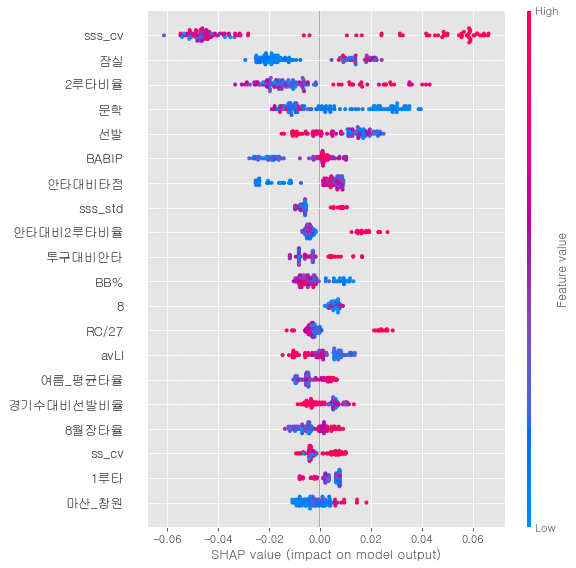

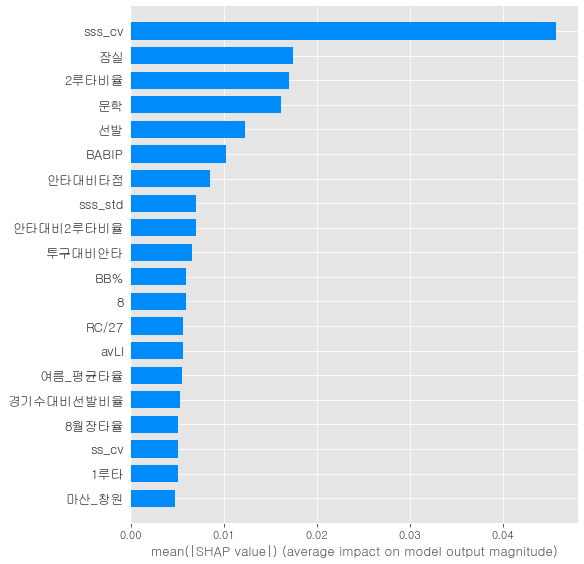

,column_name,shap_importance
141,sss_cv,0.045716
13,잠실,0.017364
56,2루타비율,0.017021
10,문학,0.016056
43,선발,0.012228
...,...,...
77,2주기_장타율,0.0
35,도루,0.0
76,2주기_출루율,0.0
80,3주기_장타율,0.0


In [161]:
#새플리가치로 피쳐임포턴스 확인
import shap


X_importance = X_test_scaled

# model = XGBClassifier(random_state=0).fit(train_x, y_train)
# explainer = shap.TreeExplainer(model)
# shap_values = explainer.shap_values(X_importance)


model = LGBMRegressor(random_state=0).fit(X_train_scaled, y)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_importance)

# Plot summary_plot
shap.summary_plot(shap_values, X_importance)
# Plot summary_plot as barplot
shap.summary_plot(shap_values, X_importance, plot_type='bar')

shap_sum = np.abs(shap_values).mean(axis=0)
importance_df = pd.DataFrame([X_importance.columns.tolist(), shap_sum.tolist()]).T
importance_df.columns = ['column_name', 'shap_importance']
importance_df = importance_df.sort_values('shap_importance', ascending=False)
importance_df

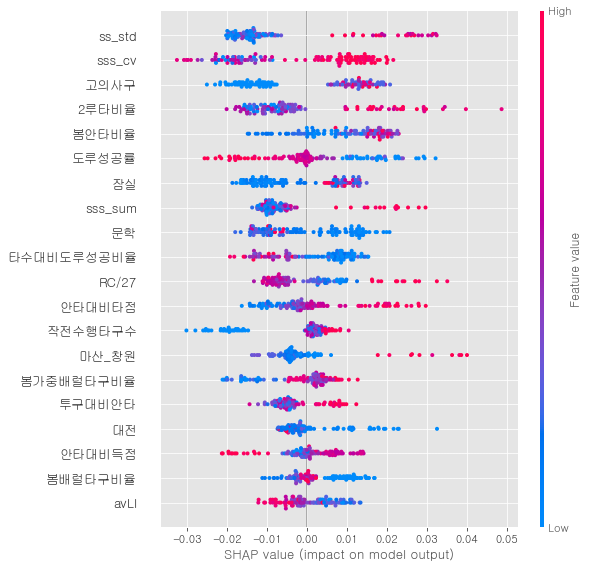

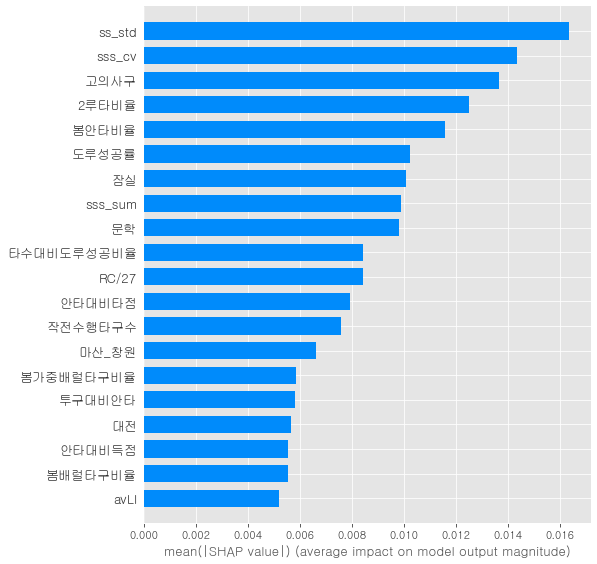

,column_name,shap_importance
133,ss_std,0.016374
141,sss_cv,0.014369
37,고의사구,0.013672
56,2루타비율,0.012497
64,봄안타비율,0.011581
...,...,...
87,6주기_타율,0.0
86,5주기_장타율,0.0
85,5주기_출루율,0.0
84,5주기_타율,0.0


In [162]:
#새플리가치로 피쳐임포턴스 확인
import shap


X_importance = X_test_scaled2

# model = XGBClassifier(random_state=0).fit(train_x, y_train)
# explainer = shap.TreeExplainer(model)
# shap_values = explainer.shap_values(X_importance)


model = LGBMRegressor(random_state=0).fit(X_train_scaled2, y2)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_importance)

# Plot summary_plot
shap.summary_plot(shap_values, X_importance)
# Plot summary_plot as barplot
shap.summary_plot(shap_values, X_importance, plot_type='bar')

shap_sum = np.abs(shap_values).mean(axis=0)
importance_df = pd.DataFrame([X_importance.columns.tolist(), shap_sum.tolist()]).T
importance_df.columns = ['column_name', 'shap_importance']
importance_df = importance_df.sort_values('shap_importance', ascending=False)
importance_df

100%|██████████| 95/95 [00:04<00:00, 22.81it/s]


(17, -0.12841414211329763)


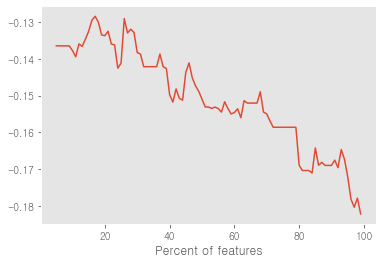

In [163]:
#스태킹용 피쳐
from sklearn.model_selection import ShuffleSplit

model = LinearRegression()

cv_scores = []

sscv = ShuffleSplit(n_splits = 5, random_state = 0)

for p in tqdm(range(5,100,1)):
    X_new = SelectPercentile(percentile=p).fit_transform(X_train_scaled, y)    
    cv_score = cross_val_score(model, X_new, y, scoring='neg_root_mean_squared_error', cv=sscv).mean()
    cv_scores.append((p,cv_score))

# Print the best percentile
best_score = cv_scores[np.argmax([score for _, score in cv_scores])]
print(best_score)

# Plot the performance change with p
plt.plot([k for k, _ in cv_scores], [score for _, score in cv_scores])
plt.xlabel('Percent of features')
plt.grid()

In [164]:
# 과적합을 피하기 위해 최적의 p값 주변의 값을 선택하는게 더 나은 결과를 얻을 수 있다. 
fs = SelectPercentile(percentile=best_score[0]).fit(X_train_scaled, y)
X_train_select = fs.transform(X_train_scaled)
X_test_select = fs.transform(X_test_scaled)

In [165]:
X_train_nothuman=X.copy()
X_test_nothuman=XX_test.copy()

In [166]:
print(X_train_select.shape)
print(X_train_nothuman.columns[fs.get_support()].tolist()) #get_support: 선택한 특성을 불린값으로 보여줘서 어떤 특성을 선택했는지 알 수 있다.

(166, 24)
['수원', '타점', '도실', '사구', '선발', '일자', '삼진', '희타', '1주기_타율', '2주기_타율', '3주기_타율', '4주기_타율', '5주기_타율', '6주기_타율', '7주기_타율', '8주기_타율', '9주기_타율', '10주기_타율', '타율', '타율2', 'BABIP', '투구대비안타', 'ss_cv', 'sss_cv']


100%|██████████| 95/95 [00:05<00:00, 16.77it/s]


(23, -0.14111991477075914)


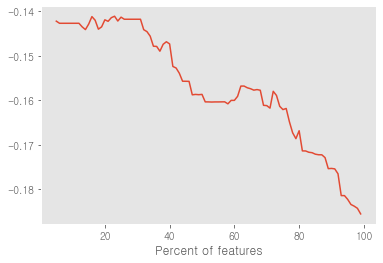

In [167]:
from sklearn.model_selection import ShuffleSplit

model = LinearRegression()

cv_scores = []

sscv = ShuffleSplit(n_splits = 5, random_state = 0)

for p in tqdm(range(5,100,1)):
    X_new = SelectPercentile(percentile=p).fit_transform(X_train_scaled2, y2)    
    cv_score = cross_val_score(model, X_new, y2, scoring='neg_root_mean_squared_error', cv=sscv).mean()
    cv_scores.append((p,cv_score))

# Print the best percentile
best_score = cv_scores[np.argmax([score for _, score in cv_scores])]
print(best_score)

# Plot the performance change with p
plt.plot([k for k, _ in cv_scores], [score for _, score in cv_scores])
plt.xlabel('Percent of features')
plt.grid()

In [168]:
# 과적합을 피하기 위해 최적의 p값 주변의 값을 선택하는게 더 나은 결과를 얻을 수 있다. 
fs = SelectPercentile(percentile=best_score[0]).fit(X_train_scaled2, y2)
X_train_select2 = fs.transform(X_train_scaled2)
X_test_select2 = fs.transform(X_test_scaled2)

In [169]:
XX_train_nothuman=XX.copy()
XX_test_nothuman=XT_test.copy()

In [170]:
print(X_train_select2.shape)
print(XX_train_nothuman.columns[fs.get_support()].tolist()) #get_support: 선택한 특성을 불린값으로 보여줘서 어떤 특성을 선택했는지 알 수 있다.

(257, 33)
['수원', '잠실', '타점', '도실', '고의사구', '사구', '홈런', '일자', '삼진', '루타', '여름_평균타율', '봄가중배럴타구비율', '1주기_타율', '2주기_타율', '3주기_타율', '4주기_타율', '5주기_타율', '6주기_타율', '7주기_타율', '8주기_타율', '9주기_타율', '10주기_타율', 'OPS', '타율', '타율2', 'BBK', 'wOBA', 'GPA', 'BABIP', 'RawEqA', 'WRAA', '투구대비안타', 'ss_cv']


# 5.모델링

In [171]:
X_train2, X_valid, y_train, y_valid = train_test_split(X_train_select, y, test_size=0.2, random_state=0)

In [172]:
clfs = [
   (
        KNeighborsRegressor(),              # 사용하려는 모델
        {'n_neighbors': [3,5,7,9,11],        # 최적화하려는 하이퍼파라미터
         'weights': ['uniform','distance']}
    ),
    (
        LinearRegression(),  
        {
         }
    ),
    (
        RandomForestRegressor(random_state=0),
        {'n_estimators': [100,200,300],
         'max_depth': [3,4,5],}
        # 'max_features': (np.arange(0.5, 1.0, 0.1)*X_train.shape[1]).astype(int)}
    ),
    (
        GradientBoostingRegressor(random_state=0),
        {'n_estimators': [100, 200, 300],
         'learning_rate': [1, 0.1, 0.01],}
        # 'max_features': (np.arange(0.5, 1.0, 0.1)*X_train.shape[1]).astype(int)}
    ),
    (
        XGBRegressor(tree_method = 'hist', random_state=0),
        {'min_child_weight': range(0, 121, 20),
         'learning_rate': np.arange(0.1, 0.6, 0.1),
         'subsample': np.arange(0.5, 1.0, 0.1)}
    ),
    (
        LGBMRegressor(random_state=0),
        {'min_child_weight': range(0, 121, 20),
         'learning_rate': np.arange(0.1, 0.6, 0.1),
         'subsample': np.arange(0.5, 1.0, 0.1)}
    ),
    (
        AdaBoostRegressor(random_state=0),
        {'n_estimators': [100, 200, 300],
         'learning_rate': [1, 0.1, 0.01],}
    ),
    (
        BaggingRegressor(random_state=0),
        {'n_estimators': [100, 200, 300],
         'max_features': (np.arange(0.5, 1.0, 0.1)*X_train2.shape[1]).astype(int)}
    ),
    (
        CatBoostRegressor(random_state=0,verbose=0),
        {'learning_rate': np.arange(0.1, 0.6, 0.1),
         'depth': [3,4,5]}
    ),
    (
        SGDRegressor(random_state=0),
        {'penalty': ['l1','l2'],
         'alpha': [0.001, 0.05, 1, 100, 200],
         'max_iter': [1000, 2000, 3000]}
    ),
    (
        ExtraTreesRegressor(random_state=0),
        {'n_estimators': [100,200,300],
         'max_depth': [3,4,5,6,7]}
    ),
    (
        DecisionTreeRegressor(random_state=0),              
        {'max_depth': range(2,9,1),        
         'criterion': ['mse', 'friedman_mse', 'mae'],
         'splitter': ['best','random']}
    ),
]

clfs_tuned = []  # 튜닝된 모델을 저장

sscv = ShuffleSplit(n_splits = 5, random_state = 0)

for clf, param_grid in tqdm(clfs):
    start = time.time()
    rand_search = RandomizedSearchCV(clf, param_grid, n_iter=5, scoring='neg_mean_squared_error', 
                                     cv=sscv, random_state=0, n_jobs=-1)
    rand_search.fit(X_train2, y_train)
    clf_name = type(clf).__name__
    clf_score = rand_search.score(X_valid, y_valid)
    print('{:30s} {:30f} {:.1f}'.format(clf_name, clf_score, time.time() - start))
    clfs_tuned.append((clf_name, rand_search, clf_score))

  8%|▊         | 1/12 [00:04<00:53,  4.90s/it]

KNeighborsRegressor                                 -0.022417 4.9
LinearRegression                                    -0.022095 0.0


 25%|██▌       | 3/12 [00:06<00:15,  1.76s/it]

RandomForestRegressor                               -0.018240 1.3


 33%|███▎      | 4/12 [00:06<00:10,  1.33s/it]

GradientBoostingRegressor                           -0.019346 0.5


 42%|████▏     | 5/12 [00:07<00:08,  1.20s/it]

XGBRegressor                                        -0.020782 0.9


 50%|█████     | 6/12 [00:09<00:07,  1.32s/it]

LGBMRegressor                                       -0.018004 1.6


 58%|█████▊    | 7/12 [00:10<00:06,  1.33s/it]

AdaBoostRegressor                                   -0.019412 1.3


 67%|██████▋   | 8/12 [00:12<00:05,  1.41s/it]

BaggingRegressor                                    -0.019260 1.6


 75%|███████▌  | 9/12 [00:20<00:10,  3.56s/it]

CatBoostRegressor                                   -0.018683 8.4
SGDRegressor                                        -0.020215 0.0


100%|██████████| 12/12 [00:21<00:00,  1.79s/it]

ExtraTreesRegressor                                 -0.020771 0.8
DecisionTreeRegressor                               -0.017857 0.0


## 5-1스태킹

In [173]:
# Initialize 1st level estimators
selected = [
    'KNeighborsRegressor', 
    'LinearRegression', 
    'RandomForestRegressor', 
    'GradientBoostingRegressor',    
    'XGBRegressor',
    'LGBMRegressor',
    'AdaBoostRegressor',
    'BaggingRegressor',
    'CatBoostRegressor',
    'SGDRegressor',
    'ExtraTreesRegressor',
    'DecisionTreeRegressor',
]
estimators = [(name, clf) for name, clf, _ in clfs_tuned if name in selected]
              
# Initialize StackingTransformer
stack = StackingTransformer(estimators, regression=True, needs_proba=True, metric=None,
                            n_folds=3, stratified=True, shuffle=True, random_state=0)

# Fit
stack = stack.fit(X_train2, y_train)

# Get your stacked features
S_train = stack.transform(X_train2)
S_valid = stack.transform(X_valid)
S_test = stack.transform(X_test_select)

# Use 2nd level estimator with stacked features
meta_model = LinearRegression().fit(S_train, y_train)
print(mean_squared_error(y_valid, meta_model.predict(S_valid)))  

0.020622430539014264


In [174]:
# Apply the stacking model to Unseen Data
me_pp2 = pd.DataFrame({'고유선수코드': X_test['고유선수코드'], '장타율': meta_model.predict(S_test)})
#me_pp2.to_csv('new_장타율_17%features.csv', encoding='cp949', index=False)

me_pp2

,고유선수코드,장타율
0,2021_50165,0.534686
1,2021_50458,0.204366
2,2021_50506,0.412494
3,2021_50704,0.431432
4,2021_50854,0.279348
...,...,...
112,2021_79240,0.507861
113,2021_79365,0.439003
114,2021_79402,0.262592
115,2021_79456,0.318436


In [175]:
target_2021 = ['2021_76232', '2021_68050', '2021_75847', '2021_67341', '2021_79192', '2021_78224', '2021_78513', '2021_76290','2021_79215', '2021_67872']

In [176]:
#10명의 선수들 장타율 확인
me_pp2.query('고유선수코드 in @target_2021')

,고유선수코드,장타율
61,2021_67341,0.522168
62,2021_67872,0.404790
64,2021_68050,0.538991
89,2021_75847,0.472589
90,2021_76232,0.543325
92,2021_76290,0.471668
102,2021_78224,0.548319
104,2021_78513,0.481132
109,2021_79192,0.550025
110,2021_79215,0.501671


# 딥러닝 모델링

In [177]:
X_train2, X_valid, y_train, y_valid = train_test_split(X_train_select2, y2, test_size=0.2, random_state=0)

In [178]:
#딥러닝 패키지
import tensorflow.keras as keras
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import * #Model
from tensorflow.keras.optimizers import *
from tensorflow.keras.regularizers import *
#from tensorflow.keras.utils.np_utils import *
#from tensorflow.keras.utils.vis_utils import * #model_to_dot
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.losses import *
from tensorflow.keras import layers
print('tf Version \n', tf.__version__)
print('tf.keras Version \n', tf.keras.__version__)

from hyperopt import hp
from hyperopt.pyll.stochastic import sample
from hyperopt import STATUS_OK
from hyperopt import fmin,rand,tpe,Trials

tf Version 
 2.4.1
tf.keras Version 
 2.4.0


In [179]:
# 매번 모델링을 할 때마다 동일한 결과를 얻으려면 아래 코드를 실행해야 함.

def reset_seeds(s1,s2,s3, reset_graph_with_backend=None):
    if reset_graph_with_backend is not None:
        K = reset_graph_with_backend
        K.clear_session()
        tf.compat.v1.reset_default_graph()
        print("KERAS AND TENSORFLOW GRAPHS RESET")  # optional

    np.random.seed(s1)
    random.seed(s2)
    tf.compat.v1.set_random_seed(s3)
#    os.environ['CUDA_VISIBLE_DEVICES'] = ''  # for GPU
#    print("RANDOM SEEDS RESET")  # optional

In [180]:
def model_fn(hp):
    inputs = keras.Input(shape=(X_train2.shape[1],))
    x = inputs
    for i in range(hp.Int('num_layers', 2, 3)):
        x = keras.layers.Dense(hp.Int('unit_'+str(i), 16, 64, step=16), activation='relu')(x)
        x = keras.layers.Dropout(hp.Float('dropout_'+str(i), 0, 0.5, step=0.25, default=0.5))(x) #0프로 25프로 50프로
    outputs = keras.layers.Dense(1, activation='linear')(x)
    model = keras.Model(inputs, outputs)
    model.compile(loss='mse', 
                  optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])), 
                  metrics=[keras.metrics.RootMeanSquaredError()])
    return model

In [181]:
tuner = kt.Hyperband(model_fn,
                     objective=kt.Objective('val_root_mean_squared_error', direction="min"), 
                     max_epochs=50,
                     hyperband_iterations=2,
                     overwrite=True,
                     directory='dnn_tuning') #폴더에 튜닝한 결과가 파일로 저장됨, 오버라이트 트루로 하는게 편함

tuner.search(X_train2, y_train, validation_data=(X_valid, y_valid), 
             callbacks=[tf.keras.callbacks.EarlyStopping(patience=1)])

Trial 180 Complete [00h 00m 01s]
val_root_mean_squared_error: 0.217149555683136

Best val_root_mean_squared_error So Far: 0.13273261487483978
Total elapsed time: 00h 03m 03s
INFO:tensorflow:Oracle triggered exit


In [182]:
N = 5
rmses = []
preds = []

for i in tqdm(range(N)):
    reset_seeds(i,i*10,i*100)
    tuner = kt.Hyperband(model_fn,
                     objective=kt.Objective('val_root_mean_squared_error', direction="min"), 
                     max_epochs=10,
                     hyperband_iterations=2,
                     overwrite=True,
                     directory='dnn_tuning')
    tuner.search(X_train2, y_train, validation_data=(X_valid, y_valid), 
             callbacks=[tf.keras.callbacks.EarlyStopping(patience=1)], verbose=0)
    model = tuner.get_best_models(1)[0]
    #rmses.append(model.evaluate(X_test_select, y_test)[1])
    preds.append(model.predict(X_test_select2).flatten())    

  0%|          | 0/5 [00:00<?, ?it/s]

INFO:tensorflow:Oracle triggered exit


 20%|██        | 1/5 [00:50<03:23, 50.89s/it]

INFO:tensorflow:Oracle triggered exit


 40%|████      | 2/5 [01:42<02:34, 51.50s/it]

INFO:tensorflow:Oracle triggered exit


 60%|██████    | 3/5 [02:35<01:43, 51.93s/it]

INFO:tensorflow:Oracle triggered exit


 80%|████████  | 4/5 [03:25<00:51, 51.21s/it]

INFO:tensorflow:Oracle triggered exit


100%|██████████| 5/5 [04:17<00:00, 51.59s/it]


In [183]:
preds

[array([0.43292361, 0.35286152, 0.31238586, 0.439211  , 0.30824664,
        0.37283543, 0.3724106 , 0.36428273, 0.36480832, 0.3719156 ,
        0.34689766, 0.33643645, 0.38442963, 0.34307277, 0.33563095,
        0.3629174 , 0.36140633, 0.31874883, 0.32940668, 0.38049373,
        0.51381475, 0.38913688, 0.33921915, 0.31324652, 0.38760865,
        0.3905657 , 0.31656727, 0.3414489 , 0.44096005, 0.39162004,
        0.3889823 , 0.351035  , 0.3722067 , 0.36463973, 0.38726118,
        0.33531657, 0.37375966, 0.3229332 , 0.4099043 , 0.35977715,
        0.46193492, 0.3569278 , 0.31588382, 0.3855598 , 0.30973622,
        0.36893994, 0.37111735, 0.33388418, 0.3437557 , 0.38213414,
        0.3997844 , 0.31297216, 0.30734238, 0.37896824, 0.38532132,
        0.38655418, 0.34730613, 0.31562212, 0.36652446, 0.41868904,
        0.33225915, 0.33712882, 0.38376057, 0.30703947, 0.50069875,
        0.33902693, 0.3505759 , 0.32183594, 0.32890877, 0.3388007 ,
        0.37367642, 0.33875382, 0.3834517 , 0.45

In [184]:
me_pp = pd.DataFrame({'고유선수코드': X_test['고유선수코드'], '장타율': preds[3]})
#me_pp.to_csv('new_장타율_딥러닝_찐막.csv', encoding='cp949', index=False)


In [186]:
me_pp.query('고유선수코드 in @target_2021')

,고유선수코드,장타율
61,2021_67341,0.571376
62,2021_67872,0.448683
64,2021_68050,0.715877
89,2021_75847,0.472290
90,2021_76232,0.583374
92,2021_76290,0.431428
102,2021_78224,0.463439
104,2021_78513,0.456077
109,2021_79192,0.463958
110,2021_79215,0.482659


In [187]:
me_pp2.query('고유선수코드 in @target_2021')

,고유선수코드,장타율
61,2021_67341,0.522168
62,2021_67872,0.404790
64,2021_68050,0.538991
89,2021_75847,0.472589
90,2021_76232,0.543325
92,2021_76290,0.471668
102,2021_78224,0.548319
104,2021_78513,0.481132
109,2021_79192,0.550025
110,2021_79215,0.501671


In [188]:
me_pp.query('고유선수코드 in @target_2021')

,고유선수코드,장타율
61,2021_67341,0.571376
62,2021_67872,0.448683
64,2021_68050,0.715877
89,2021_75847,0.472290
90,2021_76232,0.583374
92,2021_76290,0.431428
102,2021_78224,0.463439
104,2021_78513,0.456077
109,2021_79192,0.463958
110,2021_79215,0.482659


In [189]:
stack_deep=pd.merge(me_pp2,me_pp,on='고유선수코드')

In [190]:
stack_deep_merge = pd.DataFrame({'고유선수코드': stack_deep['고유선수코드'], '장타율': (stack_deep.장타율_x+stack_deep.장타율_y)/2})

In [191]:
target_2021 = ['2021_76232', '2021_68050', '2021_75847', '2021_67341', '2021_79192', '2021_78224'
               , '2021_78513', '2021_76290','2021_79215', '2021_67872']

In [192]:
result = stack_deep_merge.query('고유선수코드 in @target_2021').reset_index(drop = True)

In [203]:
ex = pd.read_excel(data_path_2+"/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_평가데이터.xlsx")

In [204]:
result

,고유선수코드,장타율
0,2021_67341,0.546772
1,2021_67872,0.426737
2,2021_68050,0.627434
3,2021_75847,0.472440
4,2021_76232,0.563350
5,2021_76290,0.451548
6,2021_78224,0.505879
7,2021_78513,0.468605
8,2021_79192,0.506992
9,2021_79215,0.492165


In [205]:
ex.iloc[1:11,1] = result.고유선수코드.apply(lambda x:x.split("_")[1])

In [207]:
ex

,NO.,PCODE,OPS,장타율,출루율
0,NaN,(예시),1.090000,0.680000,0.417000
1,1,67341,0.912129,0.512230,0.399907
2,2,67872,0.749573,0.413405,0.336069
3,3,68050,0.933805,0.542398,0.391306
4,4,75847,0.827187,0.454819,0.372195
5,5,76232,0.929541,0.528337,0.401248
6,6,76290,0.837713,0.461132,0.376484
7,7,78224,0.882061,0.501144,0.381066
8,8,78513,0.840977,0.458852,0.382178
9,9,79192,0.888412,0.502936,0.385502


In [208]:
ex.iloc[1:11,3] = result.장타율

In [209]:
ex

,NO.,PCODE,OPS,장타율,출루율
0,NaN,(예시),1.090000,0.680000,0.417000
1,1,67341,0.912129,0.546772,0.399907
2,2,67872,0.749573,0.426737,0.336069
3,3,68050,0.933805,0.627434,0.391306
4,4,75847,0.827187,0.472440,0.372195
5,5,76232,0.929541,0.563350,0.401248
6,6,76290,0.837713,0.451548,0.376484
7,7,78224,0.882061,0.505879,0.381066
8,8,78513,0.840977,0.468605,0.382178
9,9,79192,0.888412,0.506992,0.385502


In [210]:
ex.iloc[1:11,2] = ex.iloc[1:11,3] + ex.iloc[1:11,4]

In [211]:
ex.to_excel(data_path_2+"/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_평가데이터.xlsx", index = False)

In [213]:
pd.read_excel(data_path_2+"/2021 빅콘테스트_데이터분석분야_챔피언리그_스포츠테크_평가데이터.xlsx")

,NO.,PCODE,OPS,장타율,출루율
0,NaN,(예시),1.090000,0.680000,0.417000
1,1,67341,0.946678,0.546772,0.399907
2,2,67872,0.762805,0.426737,0.336069
3,3,68050,1.018741,0.627434,0.391306
4,4,75847,0.844634,0.472440,0.372195
5,5,76232,0.964598,0.563350,0.401248
6,6,76290,0.828032,0.451548,0.376484
7,7,78224,0.886945,0.505879,0.381066
8,8,78513,0.850782,0.468605,0.382178
9,9,79192,0.892494,0.506992,0.385502
